### Importing Libraries

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
warnings.filterwarnings("ignore")
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from PIL import Image

In [57]:
os.chdir("D:\\projects")

In [58]:
os.listdir()

['airline_passenger_satisfaction.csv',
 'black_friday_new_doc.ipynb',
 'Book2.csv',
 'Data Set',
 'images.png',
 'IMDB Dataset.csv',
 'Problem Statement',
 'Win Prediction']

In [59]:
dd=pd.read_csv("IMDB Dataset.csv")

In [60]:
dd.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [61]:
dd["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [62]:
dd.shape

(50000, 2)

In [11]:
ss={"positive":1,
      "negative":0}
dd=dd.replace({"sentiment" : ss})

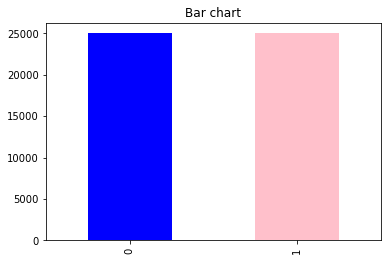

In [12]:
#Balanced 
count_Class=pd.value_counts(dd['sentiment'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "pink"])
plt.title('Bar chart')
plt.show()

### Data cleaning

In [13]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [14]:
stop_words = set(stopwords.words('english')) 
len(stop_words)

179

In [15]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

### Replacing certain words using sub which searches and replaces the word

In [16]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

### Function to clean data 

In [17]:
lemmatizer = WordNetLemmatizer()
def preprocess_text(rev):
    rev = re.sub(r"http\S+", "", rev)             # removing website links
    rev = BeautifulSoup(rev, 'lxml').get_text()   # removing html tags
    rev = decontract(rev)                         # decontracting
    rev = re.sub("\S*\d\S*", "", rev).strip()     # removing the words with numeric digits
    rev = re.sub('[^A-Za-z]+', ' ', rev)          # removing non-word characters
    rev = rev.lower()                             # converting to lower case
    rev = [word for word in rev.split(" ") if not word in stop_words] # removing stop words
    rev = [lemmatizer.lemmatize(token) for token in rev] #Lemmatization
    rev = [word for word in rev if len(word)>3 ]
    rev = " ".join(rev)
    rev.strip()
    return rev

In [18]:
dd["review1"]=dd["review"].apply(lambda x: preprocess_text(x))

In [19]:
dd

,review,sentiment,review1
0,One of the other reviewers has mentioned that ...,1,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful spend time summer weekend si...
3,Basically there's a family where a little boy ...,0,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good creative original fir...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,plot dialogue acting idiotic directing annoyin...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary school ta...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin se...


### Reviewing positive sentiments

In [21]:
positive = dd[dd['sentiment']==1]
positive 

,review,sentiment,review1
0,One of the other reviewers has mentioned that ...,1,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful spend time summer weekend si...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite movie story selflessnes...
...,...,...,...
49983,"I loved it, having been a fan of the original ...",1,loved original series always wondered back sto...
49985,Imaginary Heroes is clearly the best film of t...,1,imaginary hero clearly best film year complete...
49989,I got this one a few weeks ago and love it! It...,1,week love modern light filled true complexity ...
49992,John Garfield plays a Marine who is blinded by...,1,john garfield play marine blinded grenade figh...


In [22]:
negative = dd[dd['sentiment']==0]
negative 

,review,sentiment,review1
3,Basically there's a family where a little boy ...,0,basically family little jake think zombie clos...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,0,encouraged positive comment film looking forwa...
10,Phil the Alien is one of those quirky films wh...,0,phil alien quirky film humour based around odd...
11,I saw this movie when I was about 12 when it c...,0,movie came recall scariest scene bird eating d...
...,...,...,...
49994,This is your typical junk comedy.<br /><br />T...,0,typical junk comedy almost laugh genuine momen...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,plot dialogue acting idiotic directing annoyin...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary school ta...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin se...


In [23]:
pos=dd[dd['sentiment']==0]
pos.iloc[3][["review"]]


review    Phil the Alien is one of those quirky films wh...
Name: 10, dtype: object

### Finding the most important words in whole dataset

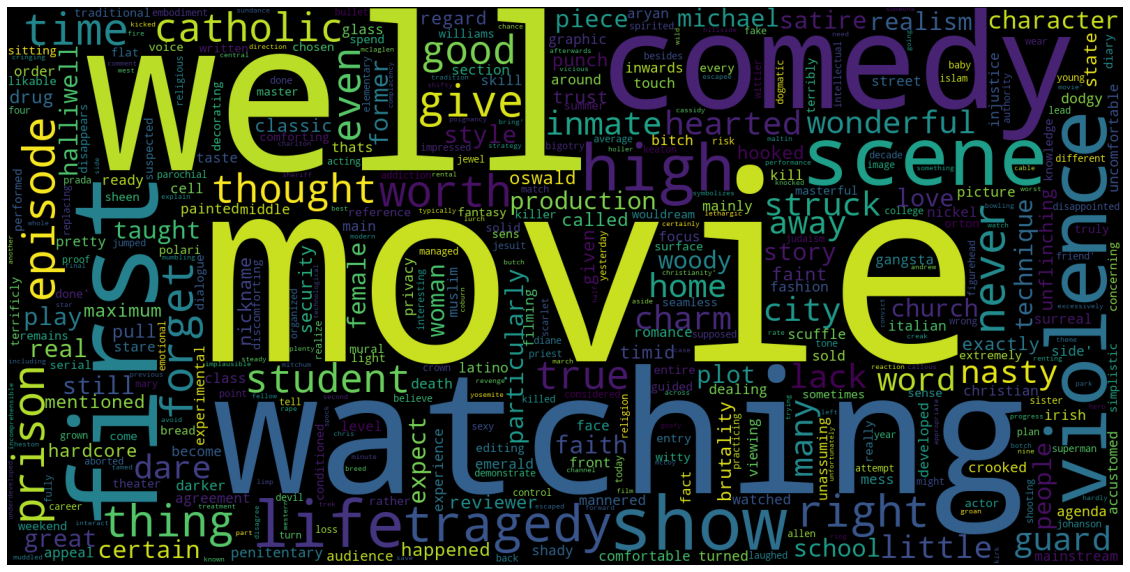

In [25]:
from wordcloud import WordCloud

text = dd['review1'].values 
wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Finding important words only in negative sentiment

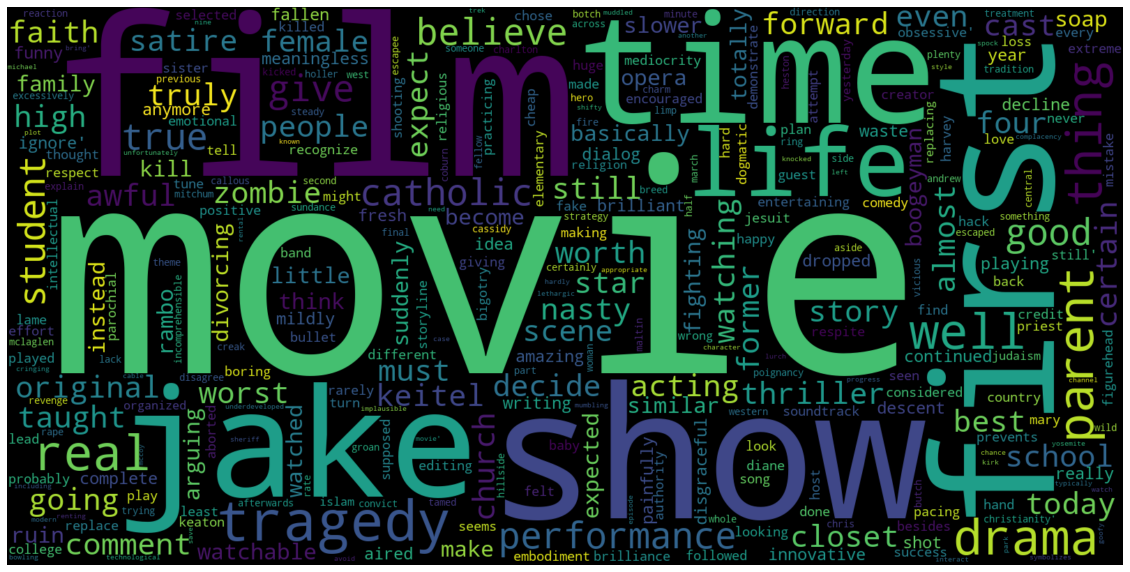

In [27]:
df_neg=dd[dd['sentiment']==0]
text = df_neg['review1'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

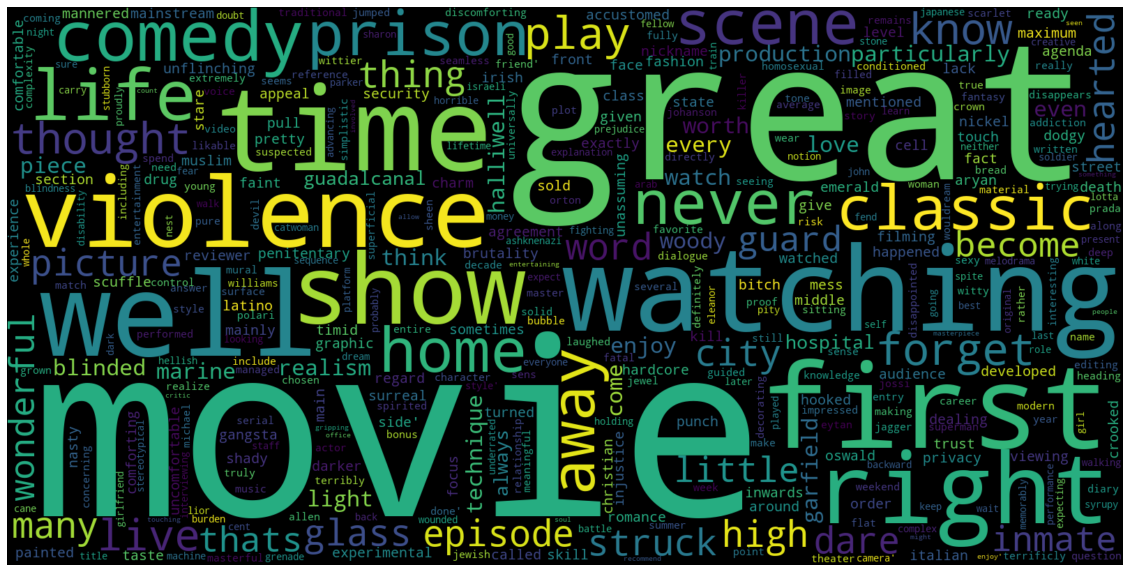

In [28]:
df_pos=dd[dd['sentiment']==1]
text = df_pos['review1'].values 

wordcloud = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(str(text))
plt.figure(figsize = (20,20))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [39]:
from collections import Counter
count1 = Counter(" ".join(dd[dd['sentiment']==1]['review1']).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in positive Sent", 1 : "count"})
print(df1) 

   words in positive Sent  count
0                    film  49661
1                   movie  44791
2                    like  18188
3                    time  16287
4                    good  15075
5                   story  14166
6               character  14016
7                   would  13180
8                   great  13005
9                    well  12818
10                   make  11234
11                   also  10787
12                 really  10730
13                  scene  10049
14                   life   9891
15                   show   9659
16                   even   9610
17                  first   9232
18                   love   9208
19                   much   9197


In [40]:
from collections import Counter
count1 = Counter(" ".join(dd[dd['sentiment']==0]['review1']).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in Negative", 1 : "count"})

print(df1)

   words in Negative  count
0              movie  58302
1               film  43696
2               like  22916
3              would  17981
4               even  15239
5               time  15114
6               good  14753
7          character  14319
8               make  12954
9             really  12347
10             could  11377
11             scene  11370
12             story  11063
13              much  10114
14            people   9530
15             thing   9463
16              made   8790
17              well   8601
18              plot   8558
19             first   8345


### Modelling the dataset

In [41]:
X=dd["review1"]
y=dd["sentiment"]

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3, random_state=123)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True,stop_words='english', min_df=20, max_df=0.7, ngram_range=(1,3)) 

In [44]:
cv.fit(X_train)  # Tokens

CountVectorizer(max_df=0.7, min_df=20, ngram_range=(1, 3), stop_words='english')

In [45]:
len(cv.get_feature_names())

21535

In [46]:
X_train_dtm = cv.transform(X_train)  # Freq of each token
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
X_train_1=pd.DataFrame(X_train_dtm.toarray(), columns=cv.get_feature_names())
X_train_1

,aaron,abandon,abandoned,abbey,abbot,abbott,abbott costello,abducted,abduction,abiding,...,zombie film,zombie flick,zombie like,zombie movie,zone,zone episode,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X_val_dtm = cv.transform(X_val)
X_val_dtm

<15000x21535 sparse matrix of type '<class 'numpy.int64'>'
	with 1228170 stored elements in Compressed Sparse Row format>

In [49]:
X_val_1=pd.DataFrame(X_val_dtm.toarray(), columns=cv.get_feature_names())
X_val_1

,aaron,abandon,abandoned,abbey,abbot,abbott,abbott costello,abducted,abduction,abiding,...,zombie film,zombie flick,zombie like,zombie movie,zone,zone episode,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_val_1.shape

(15000, 21535)

### Naive Bayes Classifier

In [70]:
from sklearn import metrics

In [63]:
from sklearn.naive_bayes import MultinomialNB

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [96]:
nb = MultinomialNB()

In [97]:
model_nb= nb.fit(X_train_1, y_train)

In [98]:
y_pred_nb = model_nb.predict(X_val_1)

In [99]:
tmp4 = pd.Series({'Model': " Naive Bayes Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_val, y_pred_nb),
                 'Precision Score': metrics.precision_score(y_val, y_pred_nb),
                 'Recall Score': metrics.recall_score(y_val, y_pred_nb),
                 'Accuracy Score': metrics.accuracy_score(y_val, y_pred_nb),
                 })

model_nb1_report = models_report.append(tmp4, ignore_index = True)
model_nb1_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.851267,Naive Bayes Classifier,0.852113,0.851266,0.851547


### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [77]:
model_rf = rf.fit(X_train_1,y_train)

In [78]:
y_pred_rf = model_rf.predict(X_val_1)

In [103]:
models_report=pd.DataFrame()
tmp3 = pd.Series({'Model': " Random Forest Classifier ",
                 'ROC Score' : metrics.roc_auc_score(y_val, y_pred_rf),
                 'Precision Score': metrics.precision_score(y_val, y_pred_rf),
                 'Recall Score': metrics.recall_score(y_val, y_pred_rf),
                 'Accuracy Score': metrics.accuracy_score(y_val, y_pred_rf),
                 })

model_rf1_report = models_report.append(tmp3, ignore_index = True)
model_rf1_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.850933,Random Forest Classifier,0.845672,0.850896,0.860045


### Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Create decision tree classifier object using gini index
dt = DecisionTreeClassifier(criterion='gini', random_state=0)

In [86]:
# Train model
model_dt =dt.fit(X_train_1,y_train)

# Predicting the model
y_pred_dt = model_dt.predict(X_val_1)

In [102]:
tmp2 = pd.Series({'Model': " Decision Tree with GINI ",
                 'ROC Score' : metrics.roc_auc_score(y_val, y_pred_dt),
                 'Precision Score': metrics.precision_score(y_val, y_pred_dt),
                 'Recall Score': metrics.recall_score(y_val, y_pred_dt),
                 'Accuracy Score': metrics.accuracy_score(y_val, y_pred_dt),
                 })

model_dt1_report = models_report.append(tmp2, ignore_index = True)
model_dt1_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.7238,Decision Tree with GINI,0.725027,0.723796,0.724738


### Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr=LogisticRegression()

In [92]:
# Train model
model_lr =lr.fit(X_train_1,y_train)

# Predicting the model
y_pred_lr = model_lr.predict(X_val_1)

In [93]:
tmp1= pd.Series({'Model': " logistic regression ",
                 'ROC Score' : metrics.roc_auc_score(y_val, y_pred_lr),
                 'Precision Score': metrics.precision_score(y_val, y_pred_lr),
                 'Recall Score': metrics.recall_score(y_val, y_pred_lr),
                 'Accuracy Score': metrics.accuracy_score(y_val, y_pred_lr),
                 })

model_lr1_report = models_report.append(tmp1, ignore_index = True)
model_lr1_report

,Accuracy Score,Model,Precision Score,ROC Score,Recall Score
0,0.874467,logistic regression,0.869634,0.874434,0.88222


### Comparison 

In [104]:

cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
model_rf = pd.DataFrame(columns = cols)
model_rf = model_rf.append([model_lr1_report,model_rf1_report,model_nb1_report,model_dt1_report], ignore_index = True)
model_rf 

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,logistic regression,0.874434,0.869634,0.882220,0.874467
1,Random Forest Classifier,0.850896,0.845672,0.860045,0.850933
2,Naive Bayes Classifier,0.851266,0.852113,0.851547,0.851267
3,Decision Tree with GINI,0.723796,0.725027,0.724738,0.723800


### Conclusion

In [105]:
# We observed that logistic regression gives better result as compared to all.